In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.columns = ['Customer_ID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']

In [7]:
df.describe(include='all')

,Customer_ID,Gender,Age,Annual_Income,Spending_Score
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [8]:
df.isnull().sum().sort_values(ascending=False)

Customer_ID       0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

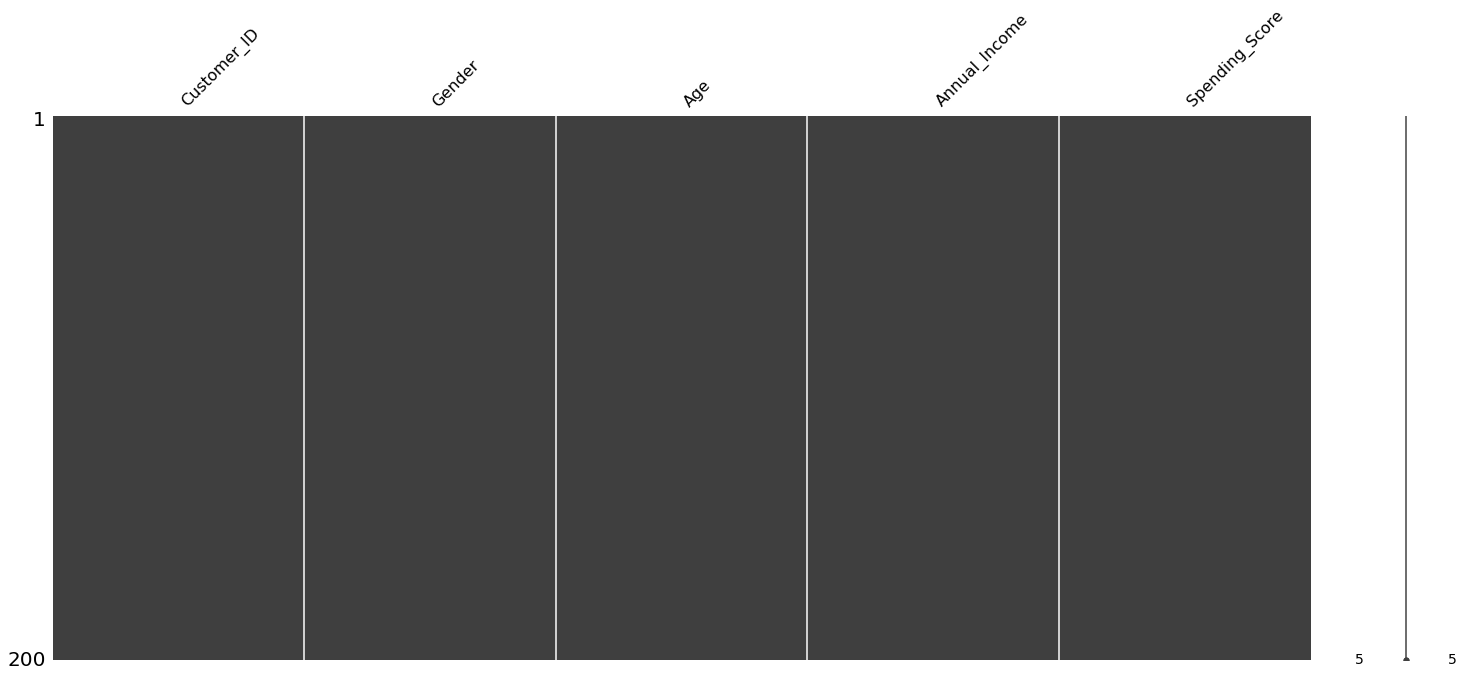

In [9]:
msno.matrix(df);

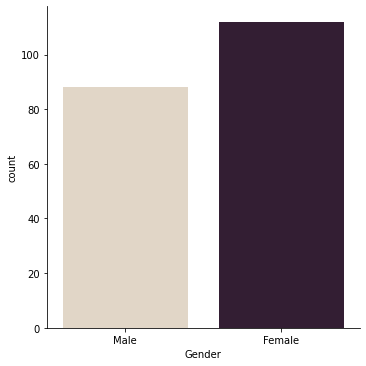

In [10]:
sns.catplot(data=df, x='Gender', kind='count', palette='ch:.25');

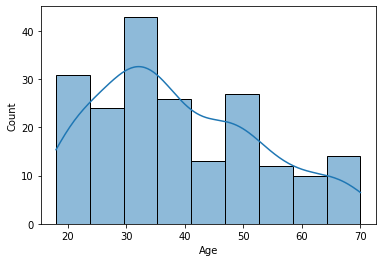

In [11]:
sns.histplot(data=df['Age'], kde=True);

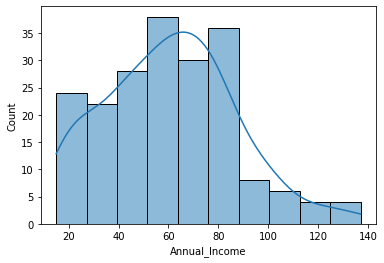

In [12]:
sns.histplot(data=df['Annual_Income'], kde=True);

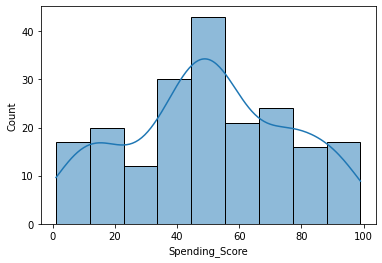

In [13]:
sns.histplot(data=df['Spending_Score'], kde=True);

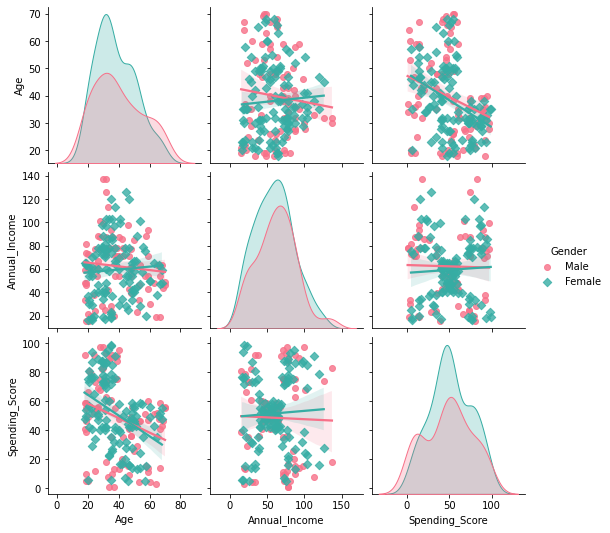

In [14]:
sns.pairplot(df, vars=['Age', 'Annual_Income', 'Spending_Score'], kind='reg', hue='Gender', palette='husl', markers = ['o','D']);

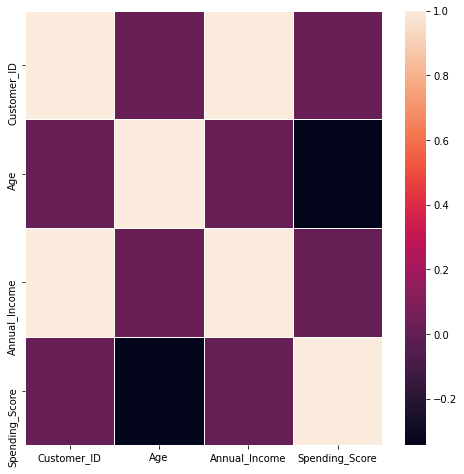

In [15]:
df_corr = df.corr(method='spearman')
plt.figure(figsize=(8,8))
sns.heatmap(df_corr, linewidths=.5);

In [16]:
df.drop(columns='Customer_ID', axis=1, inplace=True)

In [17]:
df = pd.get_dummies(df).reset_index(drop=True)

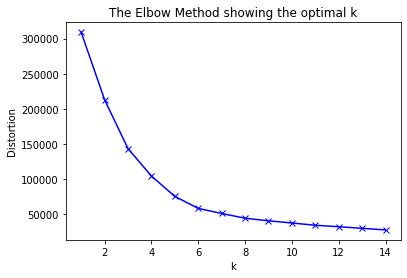

In [18]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

k = 6

In [19]:
kmeans_model = KMeans(6)
kmeans_clusters = kmeans_model.fit_predict(df)

silhouette_score(df, kmeans_clusters)

0.45176811980591935

In [20]:
agglo_model = AgglomerativeClustering(linkage='ward', n_clusters=6)
agglo_clusters = agglo_model.fit_predict(df)

silhouette_score(df, agglo_clusters)

0.4425155841206396

In [21]:
gaussian_model = GaussianMixture(n_components=6)
gaussian_clusters = gaussian_model.fit_predict(df)

silhouette_score(df, gaussian_clusters)

0.3939039999764054

In [22]:
df['Cluster'] = kmeans_clusters

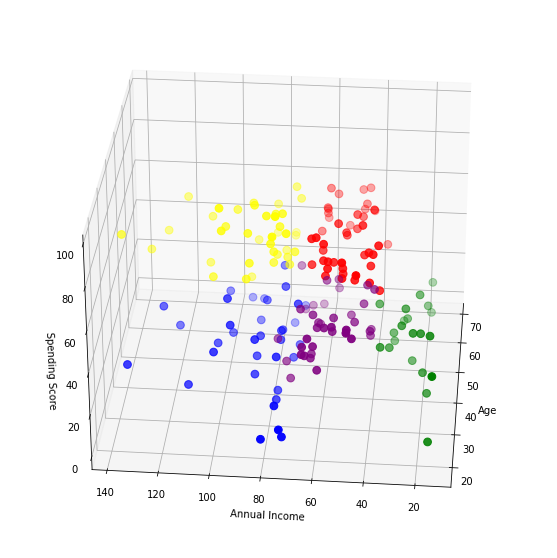

In [23]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'][df['Cluster'] == 0], df['Annual_Income'][df['Cluster'] == 0], df['Spending_Score'][df['Cluster'] == 0], c='blue', s=60)
ax.scatter(df['Age'][df['Cluster'] == 1], df['Annual_Income'][df['Cluster'] == 1], df['Spending_Score'][df['Cluster'] == 1], c='red', s=60)
ax.scatter(df['Age'][df['Cluster'] == 2], df['Annual_Income'][df['Cluster'] == 2], df['Spending_Score'][df['Cluster'] == 2], c='yellow', s=60)
ax.scatter(df['Age'][df['Cluster'] == 3], df['Annual_Income'][df['Cluster'] == 3], df['Spending_Score'][df['Cluster'] == 3], c='purple', s=60)
ax.scatter(df['Age'][df['Cluster'] == 4], df['Annual_Income'][df['Cluster'] == 4], df['Spending_Score'][df['Cluster'] == 4], c='green', s=60)
ax.view_init(30, 185)
plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()